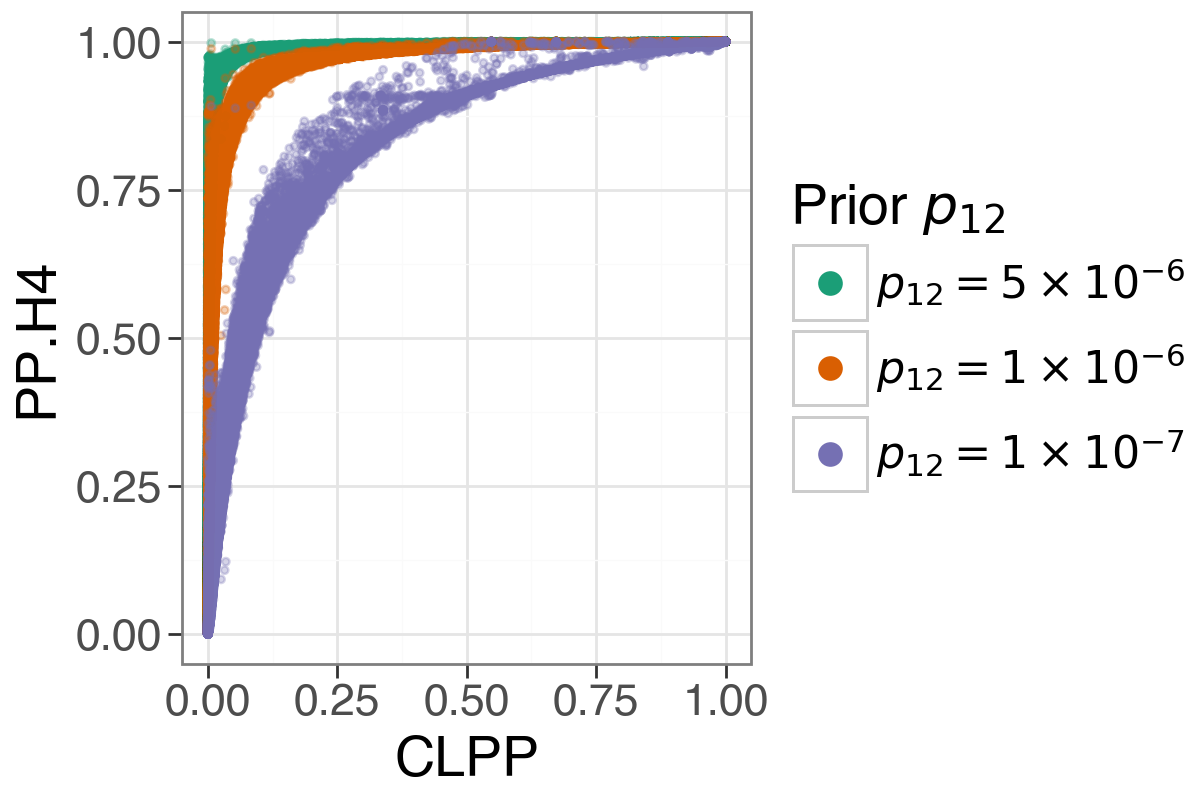

In [1]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, guide_legend, labs, theme,
    theme_bw, scale_color_brewer, guides
)

# Example loading
p5e6 = pd.read_parquet("../data/Finngen5e-6.tsv")
p1e6 = pd.read_parquet("../data/Finngen1e-6.tsv")
p1e7 = pd.read_parquet("../data/Finngen1e-7.tsv")
clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

# Merge
merged_p5e6 = p5e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how='inner')
merged_p1e6 = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how='inner')
merged_p1e7 = p1e7.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how='inner')

# Proper LaTeX strings
merged_p5e6[r'Prior $p_{12}$'] = r'$p_{12}=5\times10^{-6}$'
merged_p1e6[r'Prior $p_{12}$'] = r'$p_{12}=1\times10^{-6}$'
merged_p1e7[r'Prior $p_{12}$'] = r'$p_{12}=1\times10^{-7}$'

df = pd.concat([merged_p5e6, merged_p1e6, merged_p1e7])

df[r'Prior $p_{12}$'] = pd.Categorical(
    df[r'Prior $p_{12}$'],
    categories=[r'$p_{12}=5\times10^{-6}$', r'$p_{12}=1\times10^{-6}$', r'$p_{12}=1\times10^{-7}$']
)

plot =  (
    ggplot(df, aes(x='clpp', y='PP.H4', color=r'Prior $p_{12}$')) +
    geom_point(size=1, alpha=0.3) +  # bigger points in the plot
    labs(x='CLPP', y='PP.H4', color=r'Prior $p_{12}$') +
    theme_bw(base_size=20) +
    scale_color_brewer(
        type='qual',
        palette='Dark2',
        breaks=[r'$p_{12}=5\times10^{-6}$', r'$p_{12}=1\times10^{-6}$', r'$p_{12}=1\times10^{-7}$']
    ) +
    guides(color=guide_legend(override_aes={'alpha': 1, 'size': 4}))  # solid, larger legend dots
    + theme(figure_size=(6, 4))

)

plot


In [2]:
from plotnine import save_as_pdf_pages


save_as_pdf_pages([plot], '../figures/figure_2B.pdf', verbose=False)

In [4]:
len(df)*3

3878061